# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# Reading the dataset

In [3]:
titanic_df = pd.read_csv('titanic.csv') 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis

In [4]:
titanic_df.shape

(891, 12)

There are **891** rows & **12 columns**. This means there are 891 datapoints in the dataset and 12 features

In [5]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The **'survived'** feature is the **target** one, out of these features.

# Data visualization

In [6]:
# counting the number of survivors and non-survivors
survived_df = titanic_df[titanic_df["Survived"] == 1]
no_survived_df = titanic_df[titanic_df["Survived"] == 0]

In [7]:
# Count the survived and deceased
print("Total passengers =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")

Total passengers = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<AxesSubplot:xlabel='Pclass', ylabel='count'>

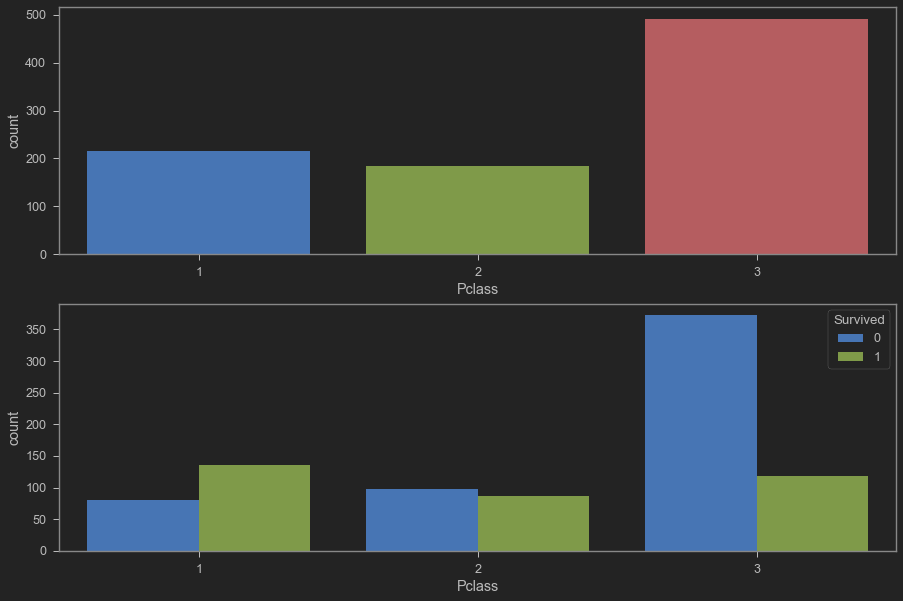

In [8]:
# Bar Chart to indicate the number of people who survived based on their class
# You have a higher chance of survival if you are a first class passenger
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Pclass', data= titanic_df)

plt.subplot(212)
sns.countplot(x= 'Pclass', hue= 'Survived', data= titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

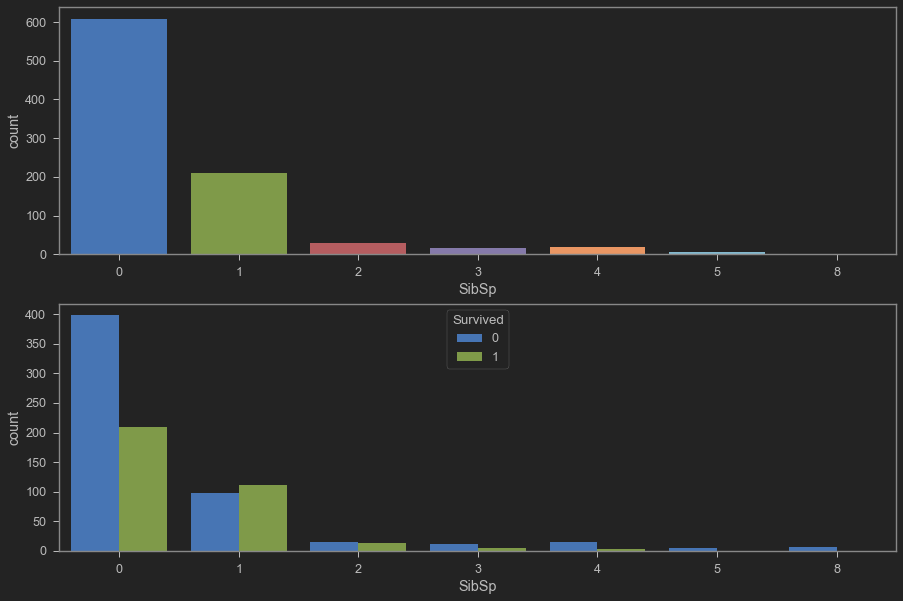

In [9]:
# Bar Chart to indicate the number of people who survived based on their siblings status

plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'SibSp', data= titanic_df)

plt.subplot(212)
sns.countplot(x= 'SibSp', hue= 'Survived', data= titanic_df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

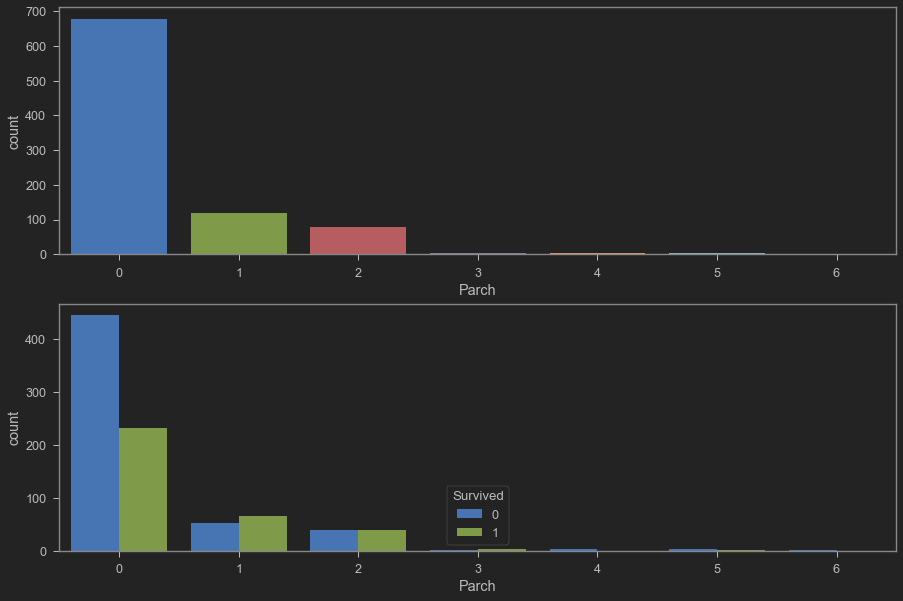

In [10]:
# Bar Chart to idicate the number of people survived based on their Parch status
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival 
plt.figure(figsize= [15, 10])
plt.subplot(211)
sns.countplot(x= 'Parch', data= titanic_df)
plt.subplot(212)
sns.countplot(x= 'Parch', hue= 'Survived', data= titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

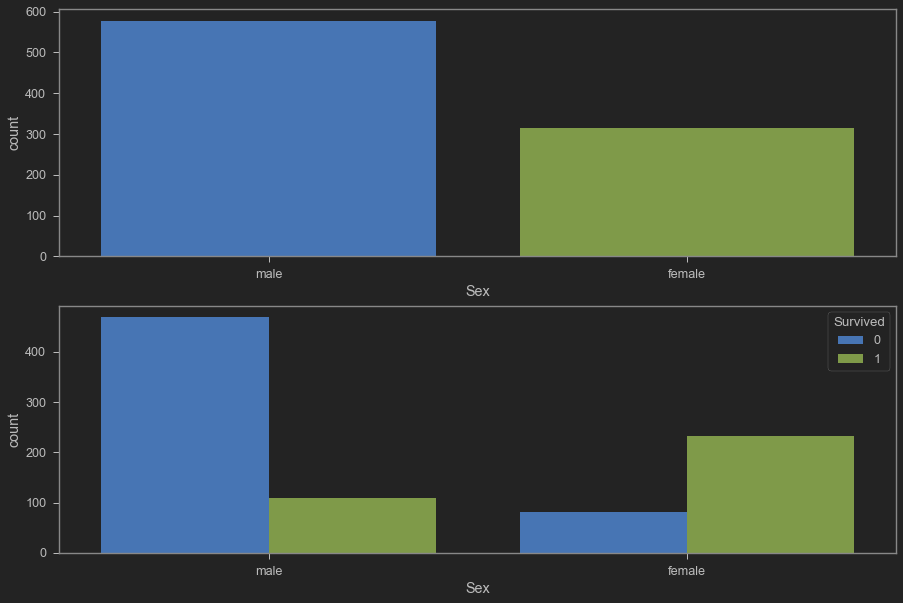

In [11]:
# Bar Chart to idicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival 
plt.figure(figsize= [15, 10])
plt.subplot(211)
sns.countplot(x= 'Sex', data= titanic_df)
plt.subplot(212)
sns.countplot(x= 'Sex', hue= 'Survived', data= titanic_df)

<AxesSubplot:>

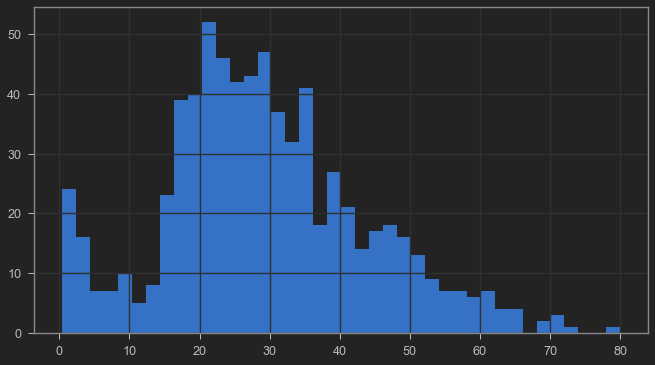

In [12]:
# Age Histogram
plt.figure(figsize= [11, 6])
titanic_df['Age'].hist(bins= 40)

<AxesSubplot:>

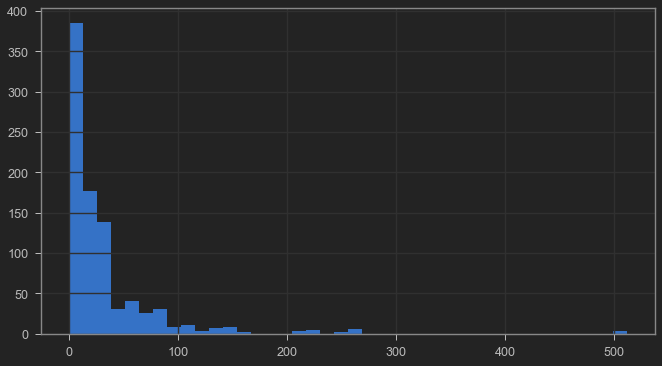

In [13]:
# Fare Histrogram
plt.figure(figsize= [11, 6])
titanic_df['Fare'].hist(bins= 40)

# Perform Data Cleaning and Feature Engineering

<AxesSubplot:>

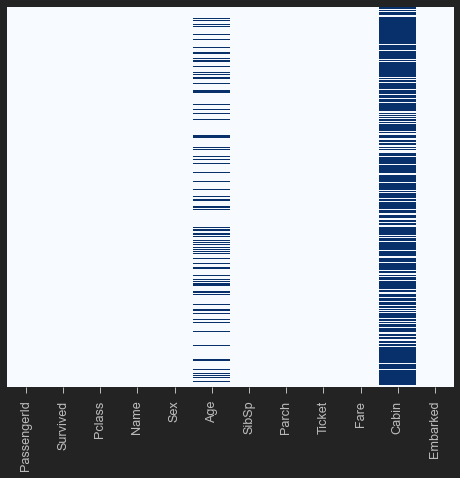

In [14]:
# What dataset is missing
sns.heatmap(titanic_df.isnull(), yticklabels= False, cbar= False, cmap="Blues")

In [15]:
# Drop the 'Cabin' column and test with inplace = true and false
titanic_df.drop('Cabin', axis= 1, inplace= True)
# Drop also 'Name', 'Ticket', 'Embarked', 'PassengerId' columns
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis= 1, inplace= True)


<AxesSubplot:>

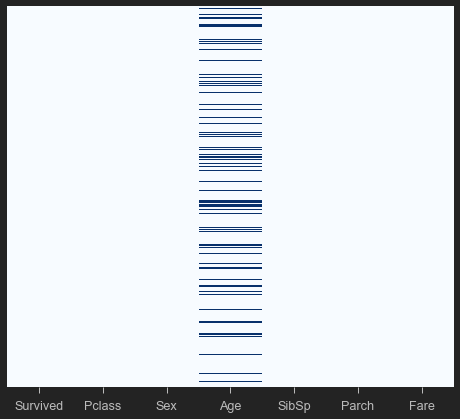

In [16]:
# What dataset is still missing
sns.heatmap(titanic_df.isnull(), yticklabels= False, cbar= False, cmap="Blues")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

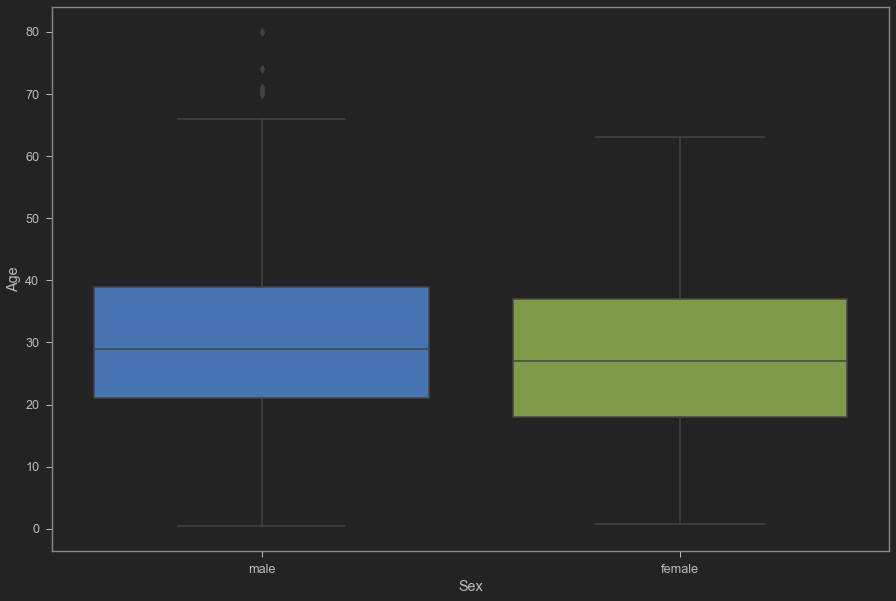

In [17]:
#Find the average age for male (~29) and female (~25)
plt.figure(figsize= (15,10))
sns.boxplot(x= 'Sex', y= 'Age', data= titanic_df)

In [18]:
def Fill_Age(data):
    age= data[0]
    sex= data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 29
        else:
            return 25
    else:
        return age

In [19]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(Fill_Age, axis= 1)

In [20]:
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
male = pd.get_dummies(titanic_df['Sex'], drop_first= True)

In [22]:
titanic_df.drop(['Sex'], axis= 1, inplace= True)

In [23]:
titanic_df= pd.concat([titanic_df, male], axis= 1)

In [47]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# Train Logistic Regression Classifier Model

In [26]:
X = titanic_df.drop('Survived', axis= 1).values
y = titanic_df['Survived'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [28]:
# Fitting Logisting Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Assess trained model performance

In [39]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<AxesSubplot:>

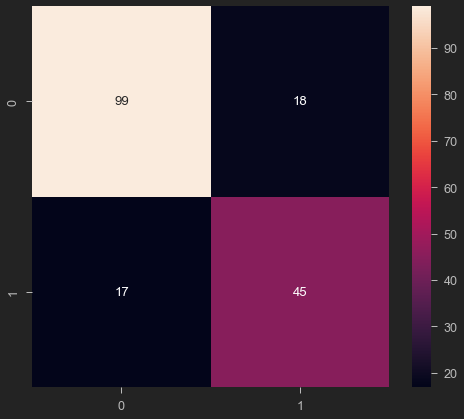

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot= True, fmt= 'd')


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179




#    Train a Naive Bayes Classifier Model using Scikit-Learn
    Assess trained model performance
    Plot the confusion matrix and classification report

In [43]:
# Fitting Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



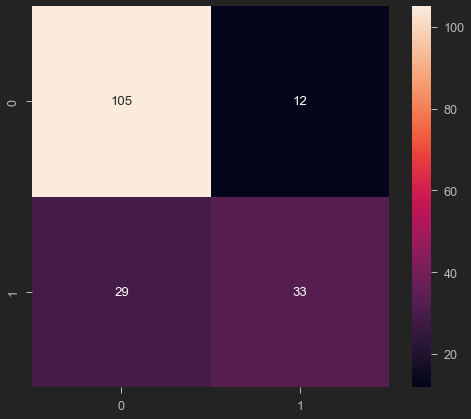

In [46]:
y_predict_test = classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))